In [1]:
from sklearn import datasets, svm, metrics
from sklearn.utils import resample
import numpy as np
import confidence_planner as cp

X, y = datasets.load_breast_cancer(return_X_y=True)
n_samples = X.shape[0]

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

n_iter = 100
accuracies = []

# Run model training and testing n_iter times
for i in range(n_iter):
    # Bootstrap indices
    indices = resample(range(n_samples), n_samples=n_samples)

    X_train = []
    y_train = []
    X_test = []
    y_test = []

    # Append images and labels with bootstrapped indices to lists for training
    for idx in indices:
        X_train.append(X[idx])
        y_train.append(y[idx])

    # Append images and labels that are not in a training subset to lists for testing
    for i in range(n_samples):
        if i not in indices:
            X_test.append(X[i])
            y_test.append(y[i])

    # Learn the digits on the train subset
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predicted)
    accuracies.append(accuracy)

acc_mean = np.mean(accuracies)
acc_median = np.mean(accuracies)
ci = cp.estimate_confidence_interval(None, accuracies, confidence_level=0.90, method="bootstrap")
sample = cp.estimate_sample_size(interval_radius=0.05, confidence_level=0.90, method="bootstrap")

print(f"Mean accuracy: {acc_mean}")
print(f"90% CI: {ci}")
print(f"Test samples needed for a 0.05 radius 90% CI: {sample}")

Mean accuracy: 0.9205110184348646
90% CI: [0.8969876113888285, 0.9420327993897788]
Test samples needed for a 0.05 radius 90% CI: 271


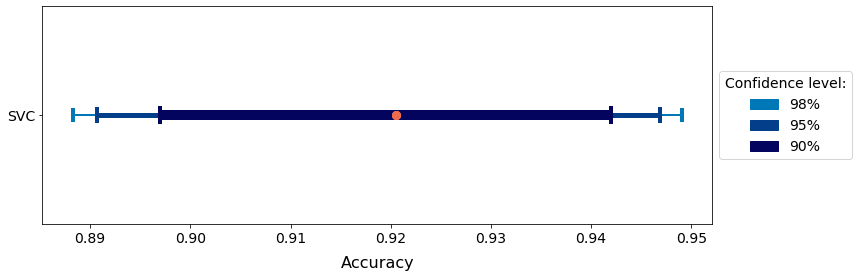

In [2]:
fig = cp.plot_classifier_intervals(
    ["SVC"], 
    [None], 
    [accuracies],
    method="bootstrap",
    width=12,
    height=4
);